# Convolutional Filters 

In [2]:
import numpy as np
from PIL import Image

In [3]:
def conv2d(X, K):

    k = int(K.shape[0])
    Xpad = np.zeros((X.shape[0]+k-1, X.shape[1]+k-1))
    Xpad[int((k-1)/2):int((k-1)/2) + X.shape[0], int((k-1)/2):int((k-1)/2) + X.shape[1]] = X
    Y = np.zeros((X.shape[0], X.shape[1]))

    for x in range(0, X.shape[0]):

        for y in range(0,X.shape[1]):

            Y[x, y] = np.dot(K.flatten(), Xpad[x:x+k, y:y+k].flatten())

    Y = np.clip(Y,0,255)
    
    return Y        

In [4]:
# Converts PIL image to numpy array
def img_to_array(img):
  return np.asarray(img).astype('float32')
  
# Converts numpy array back to PIL image
def array_to_img(arr):
  return Image.fromarray(arr.astype('uint8'))

Image 1:


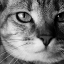

Image 2:


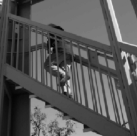

In [17]:
img1 = Image.open('datasets/images/image1.png')
img2 = Image.open('datasets/images/image2.png')
print('Image 1:')
display(img1)
print('Image 2:')
display(img2)

Image 1 original:


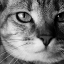

Image 1 blurred:


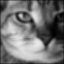

Image 1 sharpened:


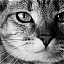

Image 2 original:


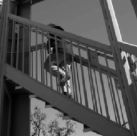

Image 2 vertical edges:


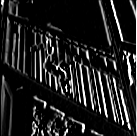

Image 2 horizontal edges:


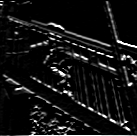

In [19]:
# Different 3 x 3 convolution filters
K_identity = np.matrix('0 0 0; 0 1 0; 0 0 0')
K_blur = 1.0/9*np.matrix('1 1 1; 1 1 1; 1 1 1') 
K_sharpen = np.matrix('0 0 0; 0 2 0; 0 0 0') - 1.0/9*np.matrix('1 1 1; 1 1 1; 1 1 1') 
K_ver_edges = np.matrix('1 0 -1; 2 0 -2; 1 0 -1')
K_hor_edges = np.transpose(K_ver_edges)

print('Image 1 original:')
display(array_to_img(conv2d(img_to_array(img1),K_identity)))
print('Image 1 blurred:')
display(array_to_img(conv2d(img_to_array(img1),K_blur)))
print('Image 1 sharpened:')
display(array_to_img(conv2d(img_to_array(img1),K_sharpen)))
print('Image 2 original:')
display(array_to_img(conv2d(img_to_array(img2),K_identity)))
print('Image 2 vertical edges:')
display(array_to_img(conv2d(img_to_array(img2),K_ver_edges)))
print('Image 2 horizontal edges:')
display(array_to_img(conv2d(img_to_array(img2),K_hor_edges)))